Công thức ABs:
$$
y_{k+1} = y_{k} + h* \begin{pmatrix}
b_0 & b_1 & \dots & b_{s-1}
\end{pmatrix} \begin{pmatrix}
f_{k}\\
f_{k-1}\\
\vdots\\
f_{k-s+1}
\end{pmatrix}
$$
Công thức xác định hệ số $B_{ABs} = \begin{pmatrix}
b_0 & b_1 & \dots & b_{s-1}
\end{pmatrix}^{\top}$ 
$$
B_{ABs}^{\top} = A^{\top}DP 
$$
trong đó
$$
A = V \begin{pmatrix}
1\\
1\\
\vdots\\
1\\
1
\end{pmatrix}, \quad V[i, j] = \dfrac{U[i, j]}{i-j+1} (j \leq i), \quad V = \begin{pmatrix}
1 & & & & \\
1 & 0 & & & \\
1 & 1 & 0 & & \\
1 & 3 & 2 & 0 & \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} \text{(Ông này tìm bằng Horner)}
$$

$$
D = \begin{pmatrix}
\dfrac{1}{0!}& & & \\
& \dfrac{1}{1!} & & \\
& & \dfrac{1}{2!} & \\
& & & \ddots 
\end{pmatrix}, \quad P = \begin{pmatrix}
1 & & & & \\
1 & -1 & & & \\
1 & -2 & 1 & & \\
1 & -3 & 3 & -1 & \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} \text{(Tam giác Pascal)}
$$


Công thức AMs:
$$
y_{k+1} = y_{k} +  h* \begin{pmatrix}
b_0 & b_1 & \dots & b_{s}
\end{pmatrix} \begin{pmatrix}
f_{k+1}\\
f_{k}\\
\vdots\\
f_{k-s+1}
\end{pmatrix}
$$
Công thức xác định hệ số $B_{AMs} = \begin{pmatrix}
b_0 & b_1 & \dots & b_{s}
\end{pmatrix}^{\top}$ 
$$
B_{AMs}^{\top} = A^{\top}DP 
$$

trong đó 
$$
A = \begin{pmatrix}
1 & & & & \\
& -1 & & & \\
& & 1 & & \\
& & & -1 & \\
& & & & \ddots
\end{pmatrix}
V \begin{pmatrix}
1\\
-1\\
1\\
-1\\
\vdots
\end{pmatrix}
$$
V, D, P xác định tương tự như ABs, chỉ thay kích thước ma trận và vector từ s thành s+1


Công thức ABs-AMs:
\begin{align*}
& z_{k+1} = y_{k} + h * B_{ABs}^{\top} \begin{pmatrix}
f_{k}\\
f_{k-1}\\
f_{k-2}\\
\ddots\\
f_{k-s+1}
\end{pmatrix}\\
& y_{k+1} = y_{k} + h * B_{AMs}^{\top} \begin{pmatrix}
f(t_{k+1}, z_{k+1})\\
f_{k}\\
f_{k-1}\\
\vdots\\
f_{k-s+1}
\end{pmatrix}
\end{align*}


In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
from fractions import Fraction
from math import gcd



Viết kết quả dưới dạng phân số cho đẹp

In [32]:
def print_matrix_as_fractions(matrix):
    col_widths = [max(len(str(matrix[row_idx, col_idx])) for row_idx in range(len(matrix))) for col_idx in range(len(matrix[0]))]
    
    for row in matrix:
        row_str = ''
        for col_idx, element in enumerate(row):
            element_str = str(element)
            if isinstance(element, Fraction):
                if element.denominator == 1:
                    element_str = str(element.numerator)
            row_str += element_str.ljust(col_widths[col_idx]) + ' '
        print(row_str)

def find_least_common_multiple(matrix):
    # Tìm tất cả các mẫu số trong ma trận
    all_denominators = []
    for row in matrix:
        all_denominators.extend(element.denominator for element in row if isinstance(element, Fraction))

    # Tìm bội số chung nhỏ nhất của tất cả các mẫu số
    lcm = all_denominators[0]
    for denominator in all_denominators[1:]:
        lcm = lcm * denominator // gcd(lcm, denominator)

    return lcm

def print_matrix_with_common_denominator(matrix):
    # Tìm bội số chung nhỏ nhất của tất cả các mẫu số trong ma trận
    lcm = find_least_common_multiple(matrix)
    col_widths = [max(len(str(matrix[row_idx, col_idx])) for row_idx in range(len(matrix))) for col_idx in range(len(matrix[0]))]
    matrix = lcm * matrix
    print('1/',lcm,'* [', end = '')
    for row in matrix:
        row_str = ''
        for col_idx, element in enumerate(row):
            element_str = str(element)
            if isinstance(element, Fraction):
                if element.denominator == 1:
                    element_str = str(element.numerator)
            row_str += element_str.ljust(col_widths[col_idx]) + ' '
        print(row_str, end=']')

    

Sử dụng lược đồ Horner để nhân P(x) với (x-c)

In [33]:
def Horner_Nhan(a, c):
    ans = np.zeros(len(a)+1)
    P_n = np.zeros(len(a)+1)
    P_n[:-1] = a
    ans[0] = P_n[0]
    for i in range(1, len(ans)):
        ans[i] = P_n[i] - c*P_n[i-1]
    return ans

Gói con tính ma trận D

In [34]:
def MaTranGiaiThua(s):
    ans = np.eye(s)
    ans = np.vectorize(Fraction)(ans)
    for i in range(1, s):
        ans[i, i] = ans[i-1, i-1]/i 
    return ans

Gói con tính ma trận U

In [35]:
def MaTranHeSo(s):
    ans = np.eye(s)
    for i in range(1,s):
        ans[i, 0:i+1] = Horner_Nhan(ans[i-1, 0:i], -(i-1))
    return ans   

Gói con tính ma trận V

In [36]:
def MaTranHeSoNguyenHam(s):
    U = MaTranHeSo(s)

    # Chuyển đổi ma trận U sang kiểu Fraction
    U = np.vectorize(Fraction)(U)

    # Tạo ma trận đơn vị với các phần tử là Fraction
    ans = np.eye(s, dtype=object)
    ans = np.vectorize(Fraction)(ans)
    #ans = np.eye(s)
    for i in range(s):
        for j in range(i+1):
            ans[i, j] = U[i, j]/Fraction(i-j+1)
    return ans

Gói con tính ma trận P

In [37]:
def MaTranHeSoSaiPhan(s):
    ans = np.eye(s)
    ans[:, 0] = 1
    for i in range(1, s):
        for j in range(1, i+1):
            ans[i, j] = ans[i-1, j] - ans[i-1, j-1]
    return ans

Gói con tính bộ hệ số của ABs

In [38]:
def HeSoAB(s):
    
    V = MaTranHeSoNguyenHam(s)
    D = MaTranGiaiThua(s)
    P = MaTranHeSoSaiPhan(s)
    
    # Chuyển các ma trận sang dạng phân số
    V = np.array(V, dtype=object)
    D = np.array(D, dtype=object)
    P = np.array(P, dtype=object)
    
    V = np.vectorize(Fraction)(V)
    D = np.vectorize(Fraction)(D)
    P = np.vectorize(Fraction)(P)
    
    M = np.ones((s, 1), dtype=object)
    M = np.vectorize(Fraction)(M)
    
    A = np.dot(V, M)
    AtD = np.dot(np.transpose(A), D)
    ans = np.dot(AtD, P)
    
    return ans


    

In [39]:
print_matrix_with_common_denominator(HeSoAB(5))

1/ 720 * [1901     -2774     2616   -1274    251     ]

Gói con tính hệ số của AMs

In [40]:
def HeSoAM(s):
    V = MaTranHeSoNguyenHam(s+1)
    D = MaTranGiaiThua(s+1)
    P = MaTranHeSoSaiPhan(s+1)
    C = np.eye(s+1)

    # Chuyển các ma trận sang dạng phân số
    V = np.array(V, dtype=object)
    D = np.array(D, dtype=object)
    P = np.array(P, dtype=object)
    C = np.array(C, dtype=object)
    
    V = np.vectorize(Fraction)(V)
    D = np.vectorize(Fraction)(D)
    P = np.vectorize(Fraction)(P)
    C = np.vectorize(Fraction)(C)
    
    M = np.ones((s+1, 1), dtype=object)
    M = np.vectorize(Fraction)(M)
    for i in range(1, s+1):
        M[i, 0] = M[i-1, 0]*(-1)
        C[i, i] = C[i-1, i-1]*(-1)
    
    A = np.dot(C,np.dot(V, M))
    AtD = np.dot(np.transpose(A), D)
    ans = np.dot(AtD, P)
    
    return ans

In [41]:
print_matrix_with_common_denominator(HeSoAM(5))


1/ 1440 * [475    1427      -798     482     -173      27    ]

Áp dụng ABs và ABs-AMs để giải phương trình vi phân

Input: điều kiện ban đầu, thời điểm ban đầu, bước lưới, số bước nhảy, hàm số f(y, t)

In [42]:
t_0 = 0
dt = 0.01 # Bước lưới h
N = 500 # Số bước thời gian cần tính
y_0 = np.array([54, 25]) # Điều kiện ban đầu 

R = 30
L = 2
C = 0.016
def F(y, t): # Hàm f(y, x)
    ans = np.copy(y)
    ans[0] = 1.2*y[0]*(1-y[0]/45) - 0.7*y[0]**2*y[1]/(1+y[0]**2)
    ans[1] = -0.4*y[1] + 0.35*y[0]**2*y[1]/(1+y[0]**2)
    return ans


Số lượng xấp xỉ đầu và cuối muốn in ra

In [43]:
k = 3

In [44]:
def AB(s, y, t):
    vector_y = np.array([y])
    vector_t = np.array([t])
    global S
    S = s
    n = 0
    while n < s-1:
        vector_y = np.vstack((vector_y, vector_y[-1] + dt*F(vector_y[-1], vector_t[-1])))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt
    while n < N:
        B = HeSoAB(s)
        B_reversed = [row[::-1] for row in B]
        y_temp = vector_y[n+1-s:]
        t_temp = vector_t[n+1-s:]
        F_temp = np.ones((s, len(y_0)))
        for i in range(s):
            F_temp[i] = F(y_temp[i], t_temp[i])
        vector_y = np.vstack((vector_y, vector_y[-1] + dt*np.dot(B_reversed, F_temp)))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt

    return vector_y, vector_t
        

In [45]:
ans_y, ans_t = AB(2, y_0, t_0)

Vẽ đồ thị kết quả cho ABs

Sử dụng Euler hiện tìm được các xấp xỉ đầu
t =  0.01 :	 Y[ 1 ]^T =  [53.7 24.99]


Nghiệm của bài toán:
t =  0.03 :	 Y[ 3 ]^T =  [53.1111446768921 24.964960605575012]
t =  0.04 :	 Y[ 4 ]^T =  [52.82401260383764 24.952450128109184]
t =  0.05 :	 Y[ 5 ]^T =  [52.54157279616124 24.939945582872312]
...
t =  4.98 :	 Y[ 498 ]^T =  [25.52968622819128 19.454636723295437]
t =  4.99 :	 Y[ 499 ]^T =  [25.52630185298028 19.44480756368035]
t =  5.0 :	 Y[ 500 ]^T =  [25.522991616183972 19.434983342804692]


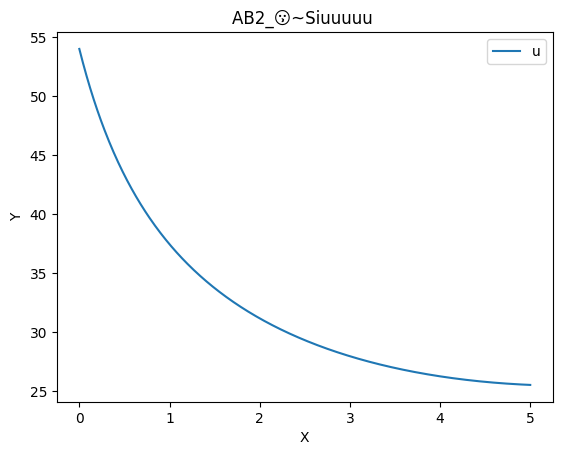

In [46]:
print("Sử dụng Euler hiện tìm được các xấp xỉ đầu")
for i in range(1,S):
    print("t = ", round(ans_t[i], 3), ":\t Y[", i, "]^T = " , ans_y[i])


print("\n\nNghiệm của bài toán:")

for i in range(k):
    print("t = ", round(ans_t[i+1+S], 3), ":\t Y[", i+1+S, "]^T = " , ans_y[i+1+S])

print("...")

for i in range(k):
    print("t = ", round(ans_t[-k+i], 3), ":\t Y[", N-k+i+1, "]^T = ", ans_y[-k+i])

# Vẽ đồ thị
ans_y = np.transpose(ans_y)

# Muốn vẽ gì thì sửa ở đây
plt.plot(ans_t, ans_y[0], label = 'u') # Vẽ y_0 theo t
#plt.plot(ans_t, ans_y[1], label = 'v')
#plt.plot(ans_t, ans_y[0], label = 'siuuuuu') # Vẽ y_1 theo t

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'AB{S}_😗~Siuuuuu ')
plt.show()

In [47]:
def AB_AM(s, y, t):
    global S
    S = s
    vector_y = np.array([y])
    vector_t = np.array([t])
    n = 0
    while n < s-1:
        vector_y = np.vstack((vector_y, vector_y[-1] + dt*F(vector_y[-1], vector_t[-1])))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt
    B1 = HeSoAB(s)
    B2 = HeSoAM(s)
    B1_reversed = [row[::-1] for row in B1]
    B2_reversed = [row[::-1] for row in B2]
    while n < N:
        y_temp = vector_y[n+1-s:]
        t_temp = vector_t[n+1-s:]
        F_temp = np.ones((s, len(y_0)))
        for i in range(s):
            F_temp[i] = F(y_temp[i], t_temp[i])
        vector_y = np.vstack((vector_y, vector_y[-1] + dt*np.dot(B1_reversed, F_temp)))
        vector_t = np.append(vector_t, t+dt)
        F_temp = np.vstack((F_temp, F(vector_y[-1], vector_t[-1])))
        vector_y[-1] = vector_y[-2] + dt*np.dot(B2_reversed, F_temp)
        n += 1
        t += dt

    return vector_y, vector_t
    



In [48]:
ans_y, ans_t = AB_AM(4, y_0, t_0) 

Vẽ đồ thị kết quả cho ABs-AMs

Sử dụng Euler hiện tìm được các xấp xỉ đầu
t =  0.01 :	 Y[ 1 ]^T =  [53.7 24.99]
t =  0.02 :	 Y[ 2 ]^T =  [53.40054664083143 24.977474679584287]
t =  0.03 :	 Y[ 3 ]^T =  [53.10614060122647 24.964955296308133]


Nghiệm của bài toán:
t =  0.05 :	 Y[ 5 ]^T =  [52.53662822696928 24.939940231704536]
t =  0.06 :	 Y[ 6 ]^T =  [52.258795082181095 24.927441611797242]
t =  0.07 :	 Y[ 7 ]^T =  [51.985423211356135 24.914948919069786]
...
t =  4.98 :	 Y[ 498 ]^T =  [25.528943465783247 19.454628955591133]
t =  4.99 :	 Y[ 499 ]^T =  [25.525560287815814 19.444799793066192]
t =  5.0 :	 Y[ 500 ]^T =  [25.52225124529257 19.43497556929236]


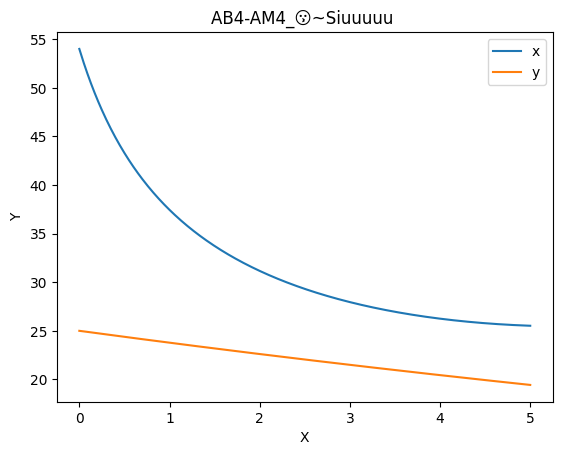

In [49]:
print("Sử dụng Euler hiện tìm được các xấp xỉ đầu")
for i in range(1,S):
    print("t = ", round(ans_t[i], 3), ":\t Y[", i, "]^T = " , ans_y[i])


print("\n\nNghiệm của bài toán:")

for i in range(k):
    print("t = ", round(ans_t[i+1+S], 3), ":\t Y[", i+1+S, "]^T = " , ans_y[i+1+S])

print("...")

for i in range(k):
    print("t = ", round(ans_t[-k+i], 3), ":\t Y[", N-k+i+1, "]^T = ", ans_y[-k+i])

# Vẽ đồ thị
ans_y = np.transpose(ans_y)

# Muốn vẽ gì thì sửa ở đây
plt.plot(ans_t, ans_y[0], label = 'x') # Vẽ y_0 theo t
plt.plot(ans_t, ans_y[1], label = 'y')
#plt.plot(ans_t, ans_y[0], label = 'siuuuuu') # Vẽ y_1 theo t

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'AB{S}-AM{S}_😗~Siuuuuu ')
plt.show()

In [50]:
#RK4
Original = np.array([[0, 0, 0, 0, 0],
                     [1/2, 1/2, 0, 0, 0],
                     [1/2, 0, 1/2, 0, 0],
                     [1, 0, 0, 1, 0],
                     [1, 1/6, 1/3, 1/3, 1/6]])
Rule_3_8 = np.array([[0, 0, 0, 0, 0],
                     [1/3, 1/3, 0, 0, 0],
                     [2/3, -1/3, 1, 0, 0],
                     [1, 1, -1, 1, 0],
                     [1, 1/8, 3/8, 3/8, 1/8]]) 

def RK(y, t, Butcher_Table):
    vector_y = np.array([y])
    vector_t = np.array([t])
    n = 0
    s = len(Butcher_Table) - 1
    B = Butcher_Table[1:, 1:]
    alpha = Butcher_Table[1:, 0]

    while n < N:
        K = np.ones((s, len(y)))
        K[0] = dt * F(vector_y[-1], vector_t[-1])
        for i in range(1, s):
            K[i] = dt * F(vector_y[-1] + np.dot(B[i-1], K), vector_t[-1] + alpha[i-1]*dt)
        vector_y = np.vstack((vector_y, vector_y[-1] + np.dot(B[-1], K)))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt

    return vector_y, vector_t


In [51]:
ans_y_RK, ans_t_RK = RK(y_0, t_0, Original)
ans_y_ABAM, ans_t_ABAM = AB_AM(4, y_0, t_0)

t =  0.01 :	 Y[ 1 ]^T =  [53.69878088 24.98789443]
t =  0.02 :	 Y[ 2 ]^T =  [53.40187592 24.97537313]
t =  0.03 :	 Y[ 3 ]^T =  [53.10991182 24.96285777]
...
t =  4.98 :	 Y[ 498 ]^T =  [25.53264639 19.45300156]
t =  4.99 :	 Y[ 499 ]^T =  [25.52926854 19.44317325]
t =  5.0 :	 Y[ 500 ]^T =  [25.52596482 19.43334988]


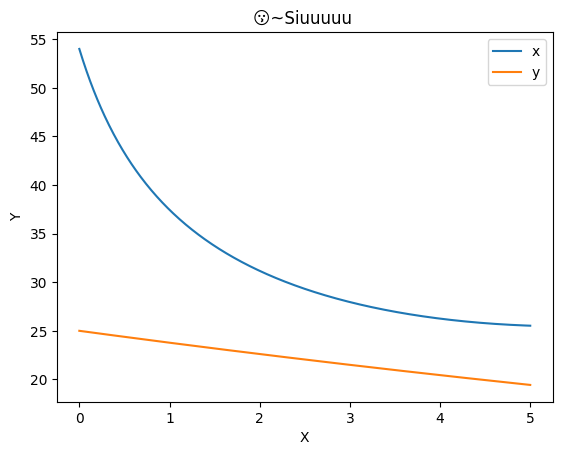

In [52]:
for i in range(k):
    print("t = ", round(ans_t_RK[i+1], 3), ":\t Y[", i+1, "]^T = " , ans_y_RK[i+1])

print("...")

for i in range(k):
    print("t = ", round(ans_t_RK[-k+i], 3), ":\t Y[", N-k+i+1, "]^T = ", ans_y_RK[-k+i])

# Vẽ đồ thị
ans_y_RK = np.transpose(ans_y_RK)

# Muốn vẽ gì thì sửa ở đây
#plt.plot(ans_t, ans_y[0] - np.exp(-1*ans_t), label = 'Sai số') # Vẽ y_0 theo t
plt.plot(ans_t_RK, ans_y_RK[0], label = 'x') # Vẽ y_1 theo t
plt.plot(ans_t_RK, ans_y_RK[1], label = 'y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()

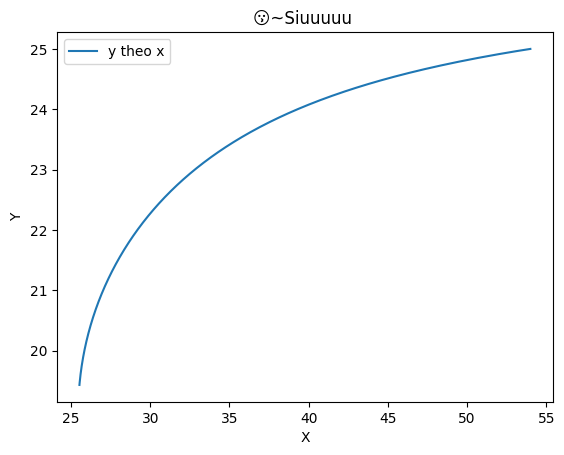

In [53]:
plt.plot(ans_y_RK[0], ans_y_RK[1], label = 'y theo x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()

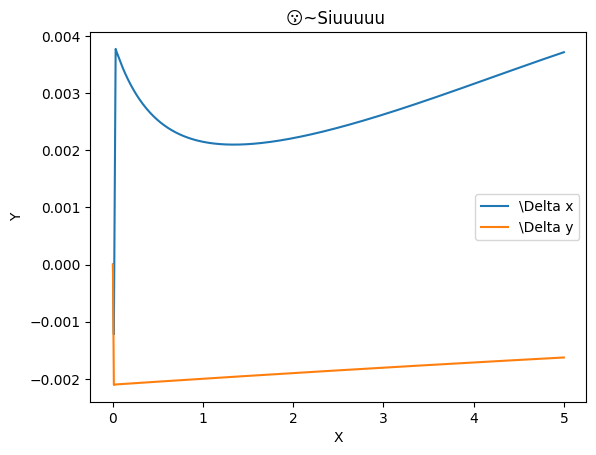

In [54]:
ans_y_ABAM = np.transpose(ans_y_ABAM)

plt.plot(ans_t_RK, ans_y_RK[0]-ans_y_ABAM[0], label = '\Delta x') # Vẽ y_1 theo t
plt.plot(ans_t_RK, ans_y_RK[1]-ans_y_ABAM[1], label = '\Delta y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()